In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV
from data_preprocessing_final2 import *

In [3]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

### read our file and clean, re-classify, train/test split, and scale our data 

In [73]:
# read our original data file
data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)

# this function will clean, dummify/ord, test/train split, and scale all our data
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [11]:
train_data_linear.head()

,PID,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_Reg,LandContour_HLS,LandContour_Low,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea
0,532353120,0,0,0,0,1,0,1,0,0,...,0.00,0.736842,0.206989,0.134831,0.000000,0.0,0.0,0.0,0.453020,0.194385
1,528188020,0,0,0,0,1,0,1,0,0,...,0.25,0.947368,0.321237,0.103933,0.048518,0.0,0.0,0.0,1.000000,0.331016
2,531373060,0,0,0,0,1,0,1,0,0,...,0.00,0.947368,0.321237,0.117978,0.091644,0.0,0.0,0.0,1.000000,0.289305
3,907202050,0,0,0,0,1,0,0,0,0,...,0.00,0.719298,0.325269,0.000000,0.000000,0.0,0.0,0.5,0.350000,0.233422
4,907200190,0,0,0,0,1,0,0,0,0,...,0.25,0.736842,0.248656,0.089185,0.000000,0.0,0.0,0.0,0.505419,0.228075


### new calling method for our train/test split and clean
- this will be a tree-based model

only using:
- train_tree_linear, train_tree_linear
- test_tree_linear, test_tree_linear

In [74]:
train_data_tree.shape

(2060, 55)

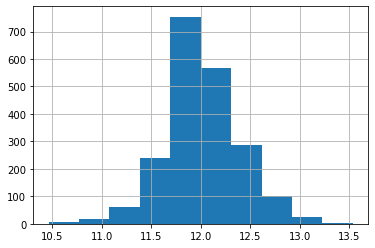

In [75]:
train_target_tree.hist()

In [76]:
# need to delete PID to run the Regression models
del train_data_tree['PID']
del test_data_tree['PID']

# model was built out using these variables so going to redefine our 
# train_data_linear, train_target_linear, test_data_linear, test_target_linear
x_train = train_data_tree
Y_train = train_target_tree

x_test = test_data_tree
Y_test = test_target_tree

# Decision Tree Model
- Fit a decision tree regressor with max_depth = 2
- Fit a decision tree regressor with max_depth = 1 to 25
- Then use GridSearch to find the best hyper-parameters


In [77]:
tree = DecisionTreeRegressor()

In [124]:
# max_depth=2
tree.set_params(max_depth=2, random_state=0)
tree.fit(x_train, Y_train)
train_error = 1 - tree.score(x_train, Y_train)
test_error = 1 - tree.score(x_test, Y_test)
print("The training score (max_depth=2) is: %.5f" %tree.score(x_train, Y_train))
print("The training error (max_depth=2) is: %.5f" %train_error)
print('-'*50)
print("The test     score (max_depth=2) is: %.5f" %tree.score(x_test, Y_test))
print("The test     error (max_depth=2) is: %.5f" %test_error)

The training score (max_depth=2) is: 0.61482
The training error (max_depth=2) is: 0.38518
--------------------------------------------------
The test     score (max_depth=2) is: 0.59908
The test     error (max_depth=2) is: 0.40092


### Setting our max_depth manually from 1-25
- printing out our train/test errors to see variations
- remember to set random_state = 0

In [125]:
#setting params max_depth=25
depth = list(range(1,26))

for num in depth:
    tree.set_params(max_depth=num, random_state=0)
    tree.fit(x_train, Y_train)
    train_error = 1 - tree.score(x_train, Y_train)
    test_error = 1 - tree.score(x_test, Y_test)
    print(tree.get_params)
    print("The training error is: %.5f" %train_error)
    print("The test     error is: %.5f" %test_error)
    
# depth=3-4 looks the best from a quick glance

<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=1, random_state=0)>
The training error is: 0.55912
The test     error is: 0.60144
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=2, random_state=0)>
The training error is: 0.38518
The test     error is: 0.40092
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=3, random_state=0)>
The training error is: 0.26665
The test     error is: 0.28411
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=4, random_state=0)>
The training error is: 0.20016
The test     error is: 0.23982
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=5, random_state=0)>
The training error is: 0.15143
The test     error is: 0.21229
<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=6, random_state=0)>
The training error is: 0.11564
The test     error is: 0.22286
<bound method BaseEstimator.get_params of DecisionTreeRegressor(

### Using GridSearch
- max_depth = 1-25

In [144]:
# setting hyper-tuning parameters
grid_para_tree = {'max_depth': range(1, 26)}

In [133]:
# remember to use accuracy for tree-based models
grid = GridSearchCV(tree, grid_para_tree, scoring ='r2')
grid.fit(x_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=25, random_state=0),
             param_grid={'max_depth': range(1, 26)}, scoring='r2')

In [134]:
## best parameters
print(grid.best_params_) #max_depth=6 is the best

## best score
print(grid.best_score_) #best score of 0.79

{'max_depth': 7}
0.798070505544515


### Feature Importance

In [135]:
# creating default graph settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,14)

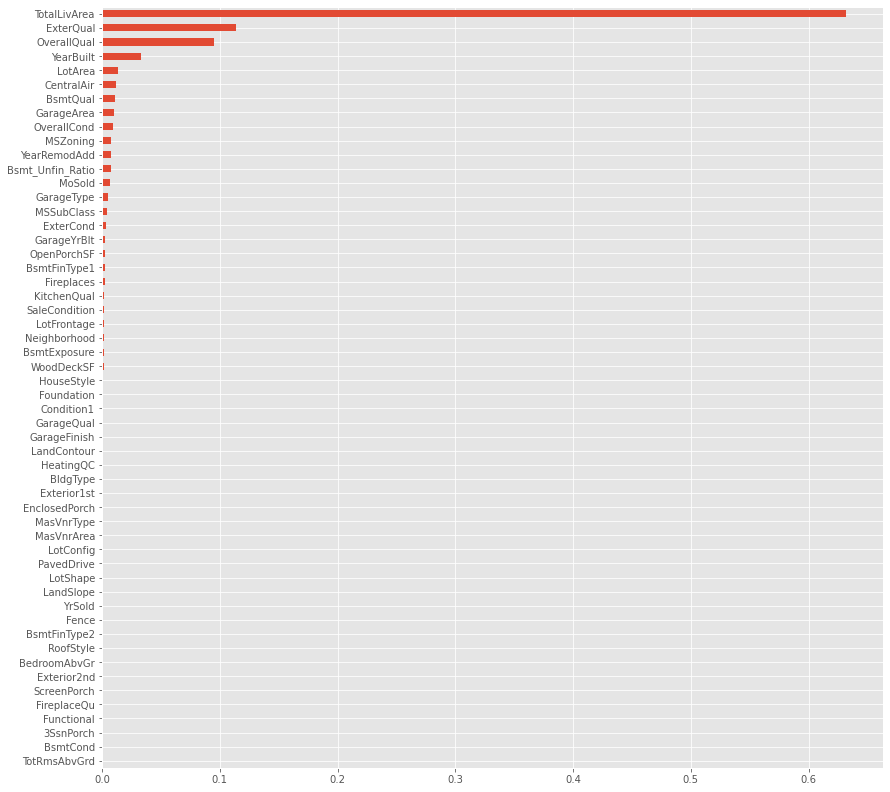

In [136]:
tree_final = grid.best_estimator_
feature_importance = pd.Series(tree_final.feature_importances_, index = x_train.columns).sort_values()
feature_importance.plot.barh()

In [137]:
feature_importance.sort_values(ascending=False)

TotalLivArea        0.631708
ExterQual           0.114220
OverallQual         0.095266
YearBuilt           0.033389
LotArea             0.013616
CentralAir          0.011600
BsmtQual            0.011363
GarageArea          0.010518
OverallCond         0.009543
MSZoning            0.008101
YearRemodAdd        0.008022
Bsmt_Unfin_Ratio    0.007403
MoSold              0.006649
GarageType          0.004974
MSSubClass          0.003913
ExterCond           0.003238
GarageYrBlt         0.002649
OpenPorchSF         0.002424
BsmtFinType1        0.002348
Fireplaces          0.002319
KitchenQual         0.002157
SaleCondition       0.001960
LotFrontage         0.001830
Neighborhood        0.001739
BsmtExposure        0.001458
WoodDeckSF          0.001418
HouseStyle          0.000855
Foundation          0.000836
Condition1          0.000790
GarageQual          0.000722
GarageFinish        0.000624
LandContour         0.000519
HeatingQC           0.000501
BldgType            0.000396
Exterior1st   

# Random Forest

In [123]:
randomForest = RandomForestRegressor()

In [140]:
# max_depth=7 since our Decision Tree was optimized at 7
randomForest.set_params(max_depth=7, random_state=0)
randomForest.fit(x_train, Y_train)
train_error = 1 - randomForest.score(x_train, Y_train)
test_error = 1 - randomForest.score(x_test, Y_test)
print("The training score (max_depth=2) is: %.5f" %randomForest.score(x_train, Y_train))
print("The training error (max_depth=2) is: %.5f" %train_error)
print('-'*50)
print("The test     score (max_depth=2) is: %.5f" %randomForest.score(x_test, Y_test))
print("The test     error (max_depth=2) is: %.5f" %test_error)

The training score (max_depth=2) is: 0.94238
The training error (max_depth=2) is: 0.05762
--------------------------------------------------
The test     score (max_depth=2) is: 0.87278
The test     error (max_depth=2) is: 0.12722


### Using GridSearch
- max_depth = 1 to 25

In [145]:
# setting hyper-tuning parameters
grid_para_forest = {'max_depth': range(1, 26), 'n_estimators': range(10, 110, 10)}

In [147]:
# run the RF classifier through the grid search
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(x_train, Y_train)   # to track time

Wall time: 2min 20s


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=7, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 26),
                         'n_estimators': range(10, 110, 10)},
             scoring='r2')

In [148]:
## best parameters
print(grid_search_forest.best_params_) #max_depth=14 is the best

## best score
print(grid_search_forest.best_score_) #best score of 0.889

{'max_depth': 14, 'n_estimators': 70}
0.888644336104151


In [151]:
# still a pretty wide gap between train/test
print("The train score is: %.5f" %grid_search_forest.best_estimator_.score(x_train, Y_train))
print("The test score  is: %.5f" %grid_search_forest.best_estimator_.score(x_test, Y_test))

The train score is: 0.98339
The test score  is: 0.88499


### Feature Importance

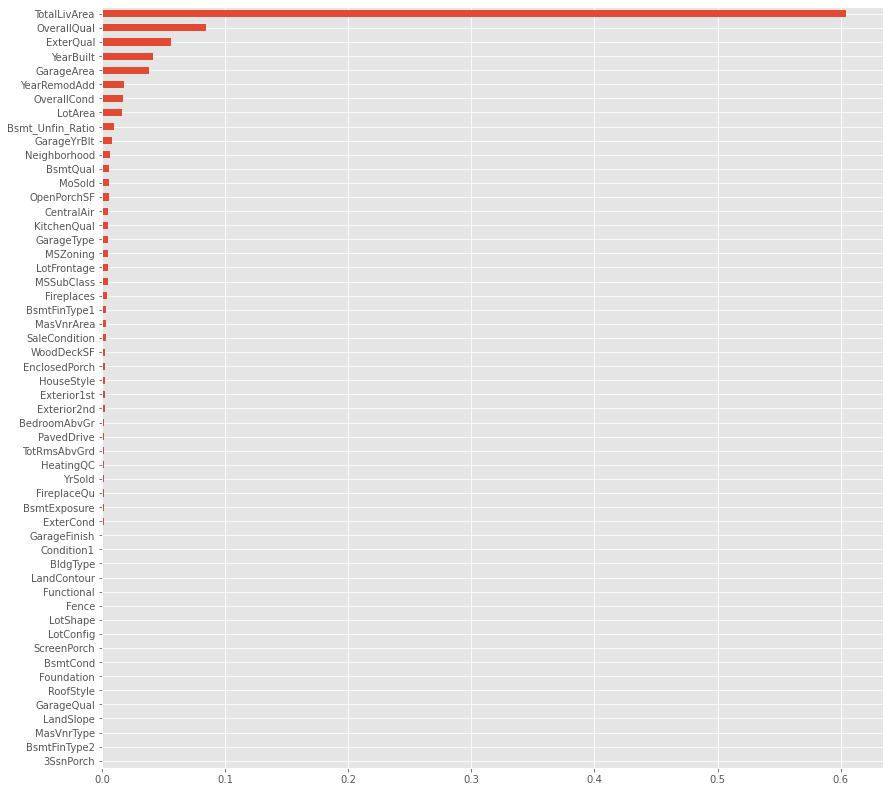

In [154]:
# feature importance sort
forest_final = grid_search_forest.best_estimator_
feature_importance = pd.Series(forest_final.feature_importances_, index = x_train.columns).sort_values(ascending=True)
feature_importance.plot.barh()

In [155]:
feature_importance.sort_values(ascending=False)

TotalLivArea        0.604311
OverallQual         0.084773
ExterQual           0.056432
YearBuilt           0.041166
GarageArea          0.038087
YearRemodAdd        0.017694
OverallCond         0.017147
LotArea             0.016559
Bsmt_Unfin_Ratio    0.009460
GarageYrBlt         0.007931
Neighborhood        0.006939
BsmtQual            0.006050
MoSold              0.005704
OpenPorchSF         0.005693
CentralAir          0.005218
KitchenQual         0.005204
GarageType          0.004791
MSZoning            0.004687
LotFrontage         0.004672
MSSubClass          0.004592
Fireplaces          0.004259
BsmtFinType1        0.003576
MasVnrArea          0.002944
SaleCondition       0.002919
WoodDeckSF          0.002737
EnclosedPorch       0.002374
HouseStyle          0.002363
Exterior1st         0.002218
Exterior2nd         0.002178
BedroomAbvGr        0.001931
PavedDrive          0.001917
TotRmsAbvGrd        0.001882
HeatingQC           0.001830
YrSold              0.001724
FireplaceQu   

### VotingRegressor
- using the VotingRegressor with Decision and Random Forest


#### VotingRegressor:
- Prediction voting regressor for unfitted estimators.
- A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [68]:
vr = VotingRegressor([('tree', lasso_optimal), ('forest', ridge_optimal)])

vr.fit(x_train, Y_train)
vr.score(x_test, Y_test)

0.9211677378415517